<a href="https://colab.research.google.com/github/Dhlih/SMT2_PBO/blob/main/jobsheet03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PRAKTIKUM 1

In [1]:
class BankAccount:
    def __init__(self, owner, balance):
        # Atribut dengan double underscore (__) dianggap "private" di Python
        self.__owner = owner
        self.__balance = balance

    def deposit(self, amount):
        """Method untuk menambahkan saldo."""
        if amount > 0:
            self.__balance += amount
            print(f"{amount} telah ditambahkan ke akun {self.__owner}.")
        else:
            print("Jumlah deposit harus lebih dari 0.")

    def withdraw(self, amount):
        """Method untuk menarik saldo."""
        if amount <= self.__balance:
            self.__balance -= amount
            print(f"{amount} telah ditarik dari akun {self.__owner}.")
        else:
            print("Saldo tidak mencukupi.")

    def get_balance(self):
        """Method untuk mendapatkan informasi saldo terkini."""
        return self.__balance

# Contoh penggunaan
if __name__ == "__main__":
    # Membuat objek BankAccount dengan owner="Alice" dan balance awal 1000
    alice_account = BankAccount(owner="Alice", balance=1000)

    # Deposit uang
    alice_account.deposit(500)    # Berhasil
    alice_account.deposit(-100)   # Gagal (validasi)

    # Withdraw uang
    alice_account.withdraw(300)   # Berhasil
    alice_account.withdraw(2000)  # Gagal (saldo tidak cukup)

    # Mendapatkan saldo
    current_balance = alice_account.get_balance()
    print(f"Saldo terakhir di akun {alice_account._BankAccount__owner}: {current_balance}")

    # Mencoba mengakses atribut 'private' langsung (tidak direkomendasikan)
    # alice_account.__balance # Akan error
    # Karena Python “mangling” nama atribut __balance menjadi _BankAccount__balance
    # Ini adalah salah satu mekanisme enkapsulasi sederhana di Python.


500 telah ditambahkan ke akun Alice.
Jumlah deposit harus lebih dari 0.
300 telah ditarik dari akun Alice.
Saldo tidak mencukupi.
Saldo terakhir di akun Alice: 1200


## PRAKTIKUM 2

In [2]:
class Employee:
    def __init__(self, name, salary):
        # Atribut privat dengan double underscore
        self.__name = name
        self.__salary = salary

    def update_salary(self, increase):
        """Method untuk menaikkan gaji dengan validasi."""
        if increase > 0:
            self.__salary += increase
            print(f"Gaji telah dinaikkan sebesar {increase}.")
        else:
            print("Nilai kenaikan harus lebih dari 0.")

    def set_salary(self, new_salary):
        """Method untuk mengubah gaji dengan validasi."""
        if new_salary >= 0:
            self.__salary = new_salary
            print(f"Gaji diatur ulang menjadi {new_salary}.")
        else:
            print("Gaji tidak dapat bernilai negatif.")

    def get_salary(self):
        """Method untuk mendapatkan informasi gaji."""
        return self.__salary

    def get_employee_info(self):
        """Method untuk menampilkan informasi karyawan secara menyeluruh."""
        return f"Employee: {self.__name}, Gaji: {self.__salary}"

# Contoh penggunaan
if __name__ == "__main__":
    # Membuat objek Employee dengan nama "John Doe" dan gaji awal 50000
    employee1 = Employee("John Doe", 50000)

    # Tampilkan informasi karyawan
    print(employee1.get_employee_info())

    # Update gaji dengan menaikkan sebesar 5000
    employee1.update_salary(5000)
    print(f"Gaji setelah kenaikan: {employee1.get_salary()}")

    # Atur ulang gaji dengan nilai baru
    employee1.set_salary(60000)
    print(f"Informasi terbaru: {employee1.get_employee_info()}")

    # Mencoba mengakses atribut privat secara langsung (tidak direkomendasikan)
    # Contoh: print(employee1.__salary) --> Ini akan menimbulkan error


Employee: John Doe, Gaji: 50000
Gaji telah dinaikkan sebesar 5000.
Gaji setelah kenaikan: 55000
Gaji diatur ulang menjadi 60000.
Informasi terbaru: Employee: John Doe, Gaji: 60000


## PRAKTIKUM 3

In [3]:
class SimpleExample:
    def __init__(self, name):
        """
        Konstruktor: Dipanggil saat objek dibuat.
        Menyimpan nilai 'name' dan mencetak pesan pembuatan objek.
        """
        self.name = name
        print(f"Konstruktor: Objek '{self.name}' telah dibuat.")

    def __del__(self):
        """
        Destruktor: Dipanggil saat objek dihapus.
        Mencetak pesan bahwa objek sedang dihapus.
        """
        print(f"Destruktor: Objek '{self.name}' sedang dihapus.")


def main():
    print("Program dimulai.\n")

    # Membuat objek SimpleExample
    obj = SimpleExample("Demo")
    print("Program sedang berjalan...\n")

    # Menghapus objek secara eksplisit
    del obj
    print("Objek telah dihapus secara eksplisit.\n")

    print("Program selesai.")


if __name__ == "__main__":
    main()


Program dimulai.

Konstruktor: Objek 'Demo' telah dibuat.
Program sedang berjalan...

Destruktor: Objek 'Demo' sedang dihapus.
Objek telah dihapus secara eksplisit.

Program selesai.


In [4]:
## PRAKTIKUM 4

In [5]:
class FileLogger:
    def __init__(self, filename):
        """
        Konstruktor: Membuka file log untuk menulis pesan.
        Parameter:
        - filename: Nama file tempat pesan log akan ditulis.
        """
        self.filename = filename
        try:
            self.file = open(filename, "a")  # Membuka file dalam mode append
            print(f"File '{filename}' berhasil dibuka untuk logging.")
        except Exception as e:
            print(f"Gagal membuka file '{filename}': {e}")

    def write_log(self, message):
        """
        Menulis pesan log ke dalam file.
        Parameter:
        - message: Pesan yang akan ditulis ke file.
        """
        self.file.write(message + "\n")
        self.file.flush()  # Memastikan pesan langsung ditulis ke disk
        print(f"Pesan log: '{message}' telah ditulis.")

    def __del__(self):
        """
        Destruktor: Menutup file log ketika objek dihapus.
        """
        if hasattr(self, "file") and not self.file.closed:
            self.file.close()
            print(f"File '{self.filename}' telah ditutup.")


# Contoh penggunaan dalam skenario nyata aplikasi
if __name__ == "__main__":
    # Membuat objek logger untuk file "application.log"
    logger = FileLogger("application.log")

    # Menulis beberapa pesan log selama operasi aplikasi
    logger.write_log("Aplikasi dimulai.")
    logger.write_log("Melakukan operasi A...")
    logger.write_log("Operasi A selesai.")
    logger.write_log("Aplikasi akan segera selesai.")

    # Menghapus objek logger secara eksplisit
    del logger

    # Jika objek tidak dihapus secara eksplisit, destruktor akan dipanggil
    # ketika program berakhir dan garbage collection membersihkan objek tersebut.


File 'application.log' berhasil dibuka untuk logging.
Pesan log: 'Aplikasi dimulai.' telah ditulis.
Pesan log: 'Melakukan operasi A...' telah ditulis.
Pesan log: 'Operasi A selesai.' telah ditulis.
Pesan log: 'Aplikasi akan segera selesai.' telah ditulis.
File 'application.log' telah ditutup.


## PRAKTIKUM 5

In [6]:
class Calculator:
    def __init__(self, initial_value=0):
        """
        Konstruktor kelas Calculator.
        - self: Mengacu pada instance yang dibuat.
        - initial_value: Nilai awal dari kalkulator.
        """
        self.value = initial_value
        print(f"Kalkulator diinisialisasi dengan nilai: {self.value}")

    def add(self, number):
        """
        Menambahkan 'number' ke nilai yang tersimpan di objek.
        - self.value: Menunjukkan nilai saat ini yang disimpan di objek tersebut.
        - number: Nilai yang akan ditambahkan.
        """
        self.value += number
        print(f"Setelah penambahan {number}, nilai sekarang adalah: {self.value}")

    def subtract(self, number):
        """
        Mengurangi 'number' dari nilai yang tersimpan.
        - self.value: Nilai saat ini dalam objek.
        - number: Nilai yang akan dikurangkan.
        """
        self.value -= number
        print(f"Setelah pengurangan {number}, nilai sekarang adalah: {self.value}")

    def reset(self):
        """
        Mengatur ulang nilai kalkulator ke 0.
        """
        self.value = 0
        print("Nilai telah direset ke 0.")

    def show_value(self):
        """
        Menampilkan nilai saat ini dari kalkulator.
        """
        print(f"Nilai saat ini adalah: {self.value}")


# Contoh penggunaan untuk memahami peran 'self'
def main():
    # Membuat objek Calculator dengan nilai awal 10
    calc1 = Calculator(initial_value=10)

    # Menggunakan metode dari objek calc1
    calc1.add(5)         # Menambah 5 ke nilai calc1
    calc1.subtract(3)    # Mengurangi 3 dari nilai calc1
    calc1.show_value()   # Menampilkan nilai calc1

    # Membuat objek Calculator lainnya dengan nilai awal default (0)
    calc2 = Calculator()
    calc2.add(20)        # Menambah 20 ke nilai calc2
    calc2.show_value()   # Menampilkan nilai calc2

    # Penjelasan peran self:
    # 'self' memungkinkan setiap instance (calc1, calc2) memiliki atribut 'value' masing-masing.
    # Perubahan yang dilakukan pada calc1 tidak akan mempengaruhi calc2,
    # karena masing-masing mengacu pada self yang berbeda (instance yang berbeda).


if __name__ == "__main__":
    main()


Kalkulator diinisialisasi dengan nilai: 10
Setelah penambahan 5, nilai sekarang adalah: 15
Setelah pengurangan 3, nilai sekarang adalah: 12
Nilai saat ini adalah: 12
Kalkulator diinisialisasi dengan nilai: 0
Setelah penambahan 20, nilai sekarang adalah: 20
Nilai saat ini adalah: 20


In [7]:
## PRAKTIKUM 6

In [8]:
class Person:
    def __init__(self, name, age):
        """
        Konstruktor untuk menginisialisasi objek Person dengan nama dan umur.
        Atribut privat (dengan double underscore) menyimpan data internal.
        """
        self.__name = name
        self.__age = age

    @property
    def name(self):
        """
        Getter untuk atribut name.
        Mengembalikan nilai dari __name.
        """
        return self.__name

    @name.setter
    def name(self, value):
        """
        Setter untuk atribut name.
        Memeriksa apakah nilai tidak kosong sebelum mengubah nilai __name.
        """
        if not value:
            print("Nama tidak boleh kosong.")
        else:
            self.__name = value

    @property
    def age(self):
        """
        Getter untuk atribut age.
        Mengembalikan nilai dari __age.
        """
        return self.__age

    @age.setter
    def age(self, value):
        """
        Setter untuk atribut age.
        Memeriksa apakah nilai umur tidak negatif sebelum mengubah nilai __age.
        """
        if value < 0:
            print("Umur tidak boleh negatif!")
        else:
            self.__age = value


# Contoh penggunaan
def main():
    # Membuat objek Person dengan nama "Alice" dan umur 30
    person = Person("Alice", 30)
    print(f"Nama: {person.name}, Umur: {person.age}")

    # Mengubah nama dan umur melalui setter
    person.name = "Bob"
    person.age = 35
    print(f"Nama baru: {person.name}, Umur baru: {person.age}")

    # Mencoba menetapkan nilai yang tidak valid untuk umur
    person.age = -5  # Akan memunculkan pesan error karena validasi umur negatif


if __name__ == "__main__":
    main()


Nama: Alice, Umur: 30
Nama baru: Bob, Umur baru: 35
Umur tidak boleh negatif!


## PENUGASAN

In [9]:
class Student:
    def __init__(self, name, score):
        self.__name = name
        self.__score = 0  # default, untuk memicu setter dan validasi
        self.__grade = "-"
        self.score = score  # akan memicu setter

    @property
    def name(self):
        return self.__name

    @name.setter
    def name(self, value):
        if value.strip() == "":
            print("Nama tidak boleh kosong.")
        else:
            self.__name = value

    @property
    def score(self):
        return self.__score

    @score.setter
    def score(self, value):
        if 0 <= value <= 100:
            self.__score = value
            self.__update_grade()
        else:
            print("Nilai harus antara 0 sampai 100.")

    def __update_grade(self):
        if self.__score >= 90:
            self.__grade = "A"
        elif self.__score >= 80:
            self.__grade = "B"
        elif self.__score >= 70:
            self.__grade = "C"
        elif self.__score >= 60:
            self.__grade = "D"
        else:
            self.__grade = "E"

    def show_info(self):
        print(f"Nama Mahasiswa: {self.__name}")
        print(f"Nilai: {self.__score}")
        print(f"Grade: {self.__grade}")

    def __del__(self):
        print(f"Data mahasiswa {self.__name} telah dihapus dari sistem.")


# Contoh Penggunaan
def main():
    student = Student("Siti", 87)
    student.show_info()

    print("Nilai diubah...")
    student.score = 93
    student.show_info()

    del student  # memicu __del__


if __name__ == "__main__":
    main()


Nama Mahasiswa: Siti
Nilai: 87
Grade: B
Nilai diubah...
Nama Mahasiswa: Siti
Nilai: 93
Grade: A
Data mahasiswa Siti telah dihapus dari sistem.


#### KELAS DIAGRAM DARI PROGRAM :

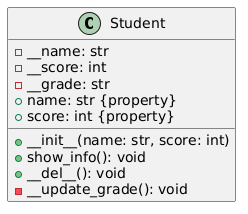